In [115]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
stocks  = "HAFNI.OL ORK.OL ELISA.HE NOKIA.HE GOGL GM"
start   = "2024-04-15"
end     = "2025-04-15"
exp_ret = 0.35 #expected yearly logarithmic return

## Brief

This is a demo of a the functions that are currently implemented in the Financial_Toolbox package. Our aim is to create robust and easy to use functions to facilitate informed decision making for retail investors. We aim to include four sections in our package: (1) a portfolio optimisation section, (2) a section for portfolio evaluation/healt assessment, (3) a section with focus on simulation and estimation, and (4) an asset pricing section.

Developers:
- Benmalek, Elias (INSA Toulouse 2024-)
- Larsen, Vetle (INSA Toulouse 2021-, Toulouse School of Management 2024-)

This jupyter notebook is made so that you may download it, change the above parameters and try our functions

## Mean-Variance optimisation under no constraints

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed


Portfolio optimised @ 35.00% gain
----------------
Return: 35.0000%
Volatility: 2.5476%
Ret/Vol: 13.74
   Composition
   ELISA.HE: 28.49%
   GM: 11.72%
   GOGL: 2.49%
   HAFNI.OL: -4.03%
   NOKIA.HE: 19.81%
   ORK.OL: 41.52%



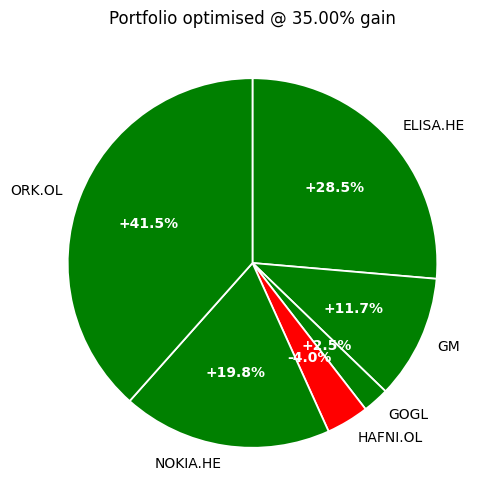

In [125]:
from optimisation import Mean_Variance_No_Constraints
from optimisation_utilities import PrintPF, ShowComposition

title = f"Portfolio optimised @ {exp_ret:.2%} gain"
pf = Mean_Variance_No_Constraints(stocks, exp_ret, start=start, end=end, verbose=False)
PrintPF(title, pf)
ShowComposition(title, pf)

## Mean-Variance optimisation without shortselling

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed


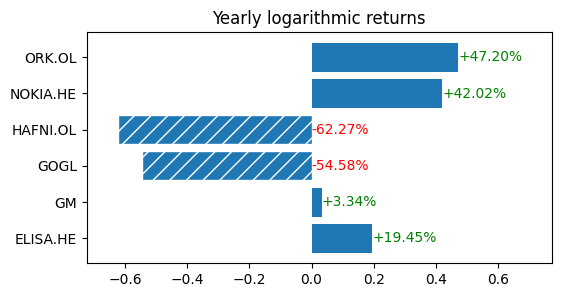

In [127]:
from optimisation import Yearly_Log_Returns
from optimisation_utilities import ShowReturns

R = Yearly_Log_Returns(stocks, start=start, end=end, verbose=False)
ShowReturns("Yearly logarithmic returns", R)

**Remark**: for the Mean_Variance_No_Shortselling program to succeed in finding a portfolio, we must pick stocks that have yearly logarithmic returns that are not too far from our expected return in absolute values.

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed


Portfolio optimised @ 35.00% gain under no short sales restriction
----------------
Return: 35.0000%
Volatility: 2.5940%
Ret/Vol: 13.49
   Composition
   ELISA.HE: 24.21%
   GM: 9.99%
   GOGL: 0.00%
   HAFNI.OL: 0.00%
   NOKIA.HE: 21.22%
   ORK.OL: 44.58%



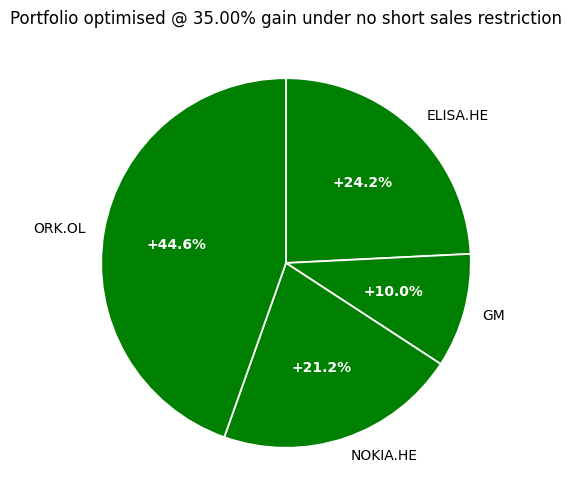

In [128]:
from optimisation import Mean_Variance_No_Shortselling
from optimisation_utilities import PrintPF, ShowComposition

title = f"Portfolio optimised @ {exp_ret:.2%} gain under no short sales restriction"
pf = Mean_Variance_No_Shortselling(stocks, exp_ret, start=start, end=end, verbose=False)
PrintPF(title, pf)
ShowComposition(title, pf)

## Efficiency frontier under no constraints

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  6 of 6 completed


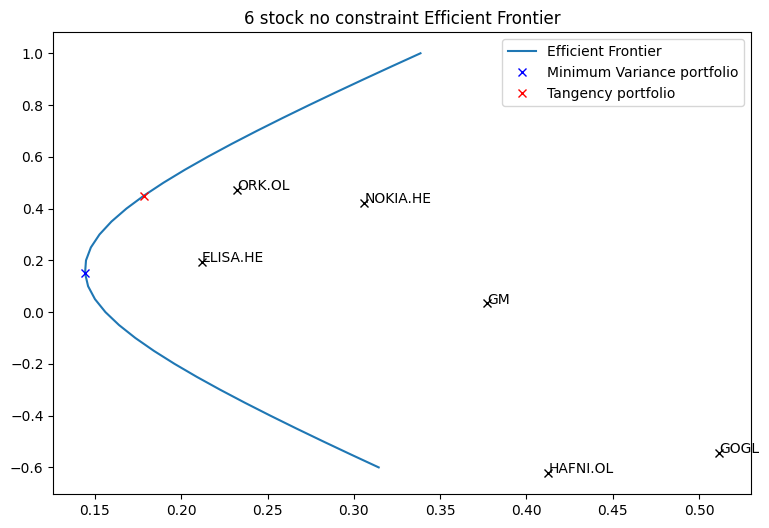

In [133]:
import matplotlib.pyplot as plt
from optimisation import Efficient_Frontier_No_Constraints
from optimisation_utilities import ShowEfficientFrontier

Efficient_Frontier = Efficient_Frontier_No_Constraints(stocks, -0.60, 1.0, 0.05, start=start, end=end, verbose=False)
n_points = int((1.0+0.60)/0.05 + 1)
ShowEfficientFrontier("6 stock no constraint Efficient Frontier", Efficient_Frontier, n_points=n_points)

### Composition of minimum variance portfolio

Minimum variance portfolio
----------------
Return: 15.0000%
Volatility: 2.0821%
Ret/Vol: 7.20
   Composition
   ELISA.HE: 36.78%
   GM: 13.02%
   GOGL: 6.95%
   HAFNI.OL: 7.90%
   NOKIA.HE: 10.83%
   ORK.OL: 24.52%



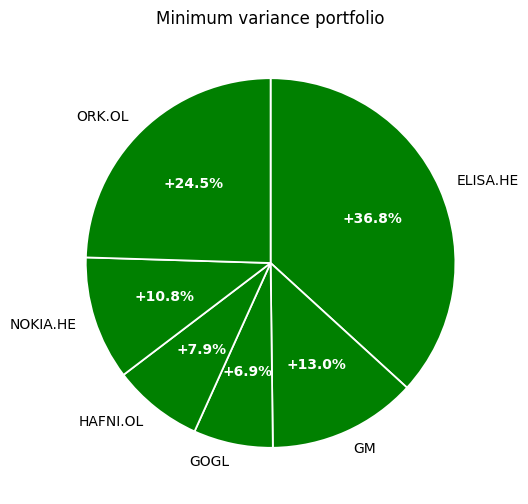

In [134]:
from optimisation_utilities import PrintPF, ShowComposition

mv_pf_idx = np.argmin(Efficient_Frontier.Vol.iloc[:n_points])
mv_pf = Efficient_Frontier.iloc[mv_pf_idx]
title = "Minimum variance portfolio"
PrintPF(title, mv_pf)
ShowComposition(title, mv_pf)

### Composition of tangency portfolio

Tangency portfolio
----------------
Return: 45.0000%
Volatility: 3.1825%
Ret/Vol: 14.14
   Composition
   ELISA.HE: 24.34%
   GM: 11.07%
   GOGL: 0.27%
   HAFNI.OL: -9.99%
   NOKIA.HE: 24.29%
   ORK.OL: 50.02%



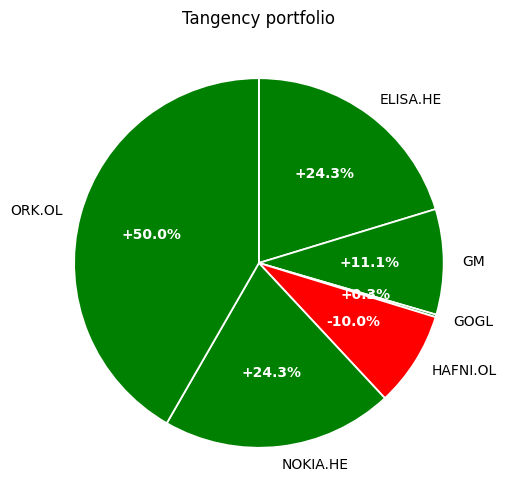

In [135]:
from optimisation_utilities import PrintPF, ShowComposition

tang_pf_idx = np.argmax(Efficient_Frontier["Ret/Vol"].iloc[:n_points])
tang_pf = Efficient_Frontier.iloc[tang_pf_idx]
title = "Tangency portfolio"
PrintPF(title, tang_pf)
ShowComposition(title, tang_pf)